<a href="https://colab.research.google.com/github/thomas774/Python/blob/master/OCR_on_CMR_using_Google_Cloud_Vision_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#BUILD an array with CMR and not CMR EXAMPLES from WEB

CMR_EXAMPLES = ['https://www.globalnegotiator.com/blog_en/wp-content/uploads/CMR-Sample.jpg', 
                'http://resources.mynewsdesk.com/image/upload/dpr_1.0,f_auto,pg_1,q_auto,w_670/rya9djfb6cvne5hd6bkv.jpg',
                'https://sc02.alicdn.com/kf/HTB1hLIdJVXXXXc9XXXXq6xXFXXX7/CMR-paper-forms.jpg',
                'https://cmr.transportator.info/wp-content/uploads/2013/07/cmr-pdf-786x1024.jpg',
                'https://img.gadgethacks.com/img/03/86/63640884812577/0/easily-scan-documents-your-iphone-ios-11.w1456.jpg',
                'https://upload.wikimedia.org/wikipedia/commons/2/23/Cmr3.jpg',
               'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Restraining_Order.jpg/200px-Restraining_Order.jpg']

In [0]:
# Set the CMR to test
CMR_num = 0

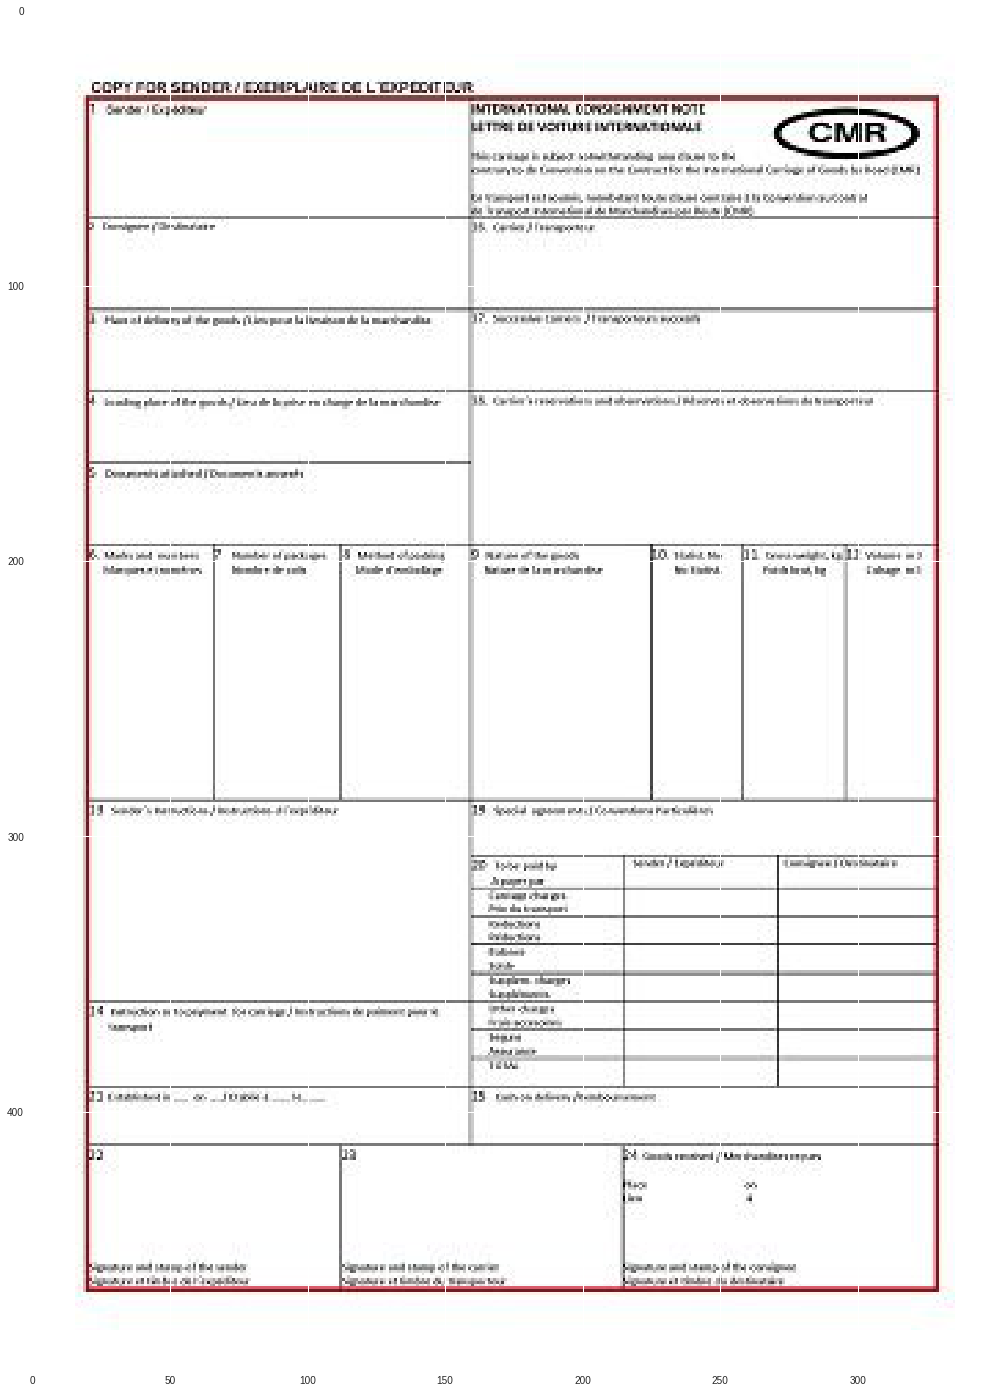

In [32]:
from skimage import io
import matplotlib.pyplot as plt

url = CMR_EXAMPLES[CMR_num]

fig=plt.figure(figsize=(25, 25))
image = io.imread(url)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [0]:
# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file where to detect text
image = vision.types.Image()
image.source.image_uri = CMR_EXAMPLES[CMR_num]

# Performs text detection on the image file
resp = client.text_detection(image=image)

# Store the dectected text into an array
text = [d.description for d in resp.text_annotations]
#print('\n'.join([d.description for d in resp.text_annotations]))

# Search for 'CMR' or 'cmr' into the array
CMR = 0
for text in text:
  if(text=='CMR' or text=='cmr'):
     CMR+=1 
      
# Check if we find 'CMR' or 'cmr' in detected text
if(CMR > 0):
  print('This document is a CMR')
else:
  print('This document is not a CMR')